In [5]:
import os
import xarray as xr
import xgcm
from matplotlib import pyplot as plt
from mlpython.utils import compute_diss
plt.style.use('./grl.mplstyle')
import numpy as np

In [7]:
# Specify the directory path
base_dir = "/Users/jiarongw/Data/multilayer_data/JPO2024/processed/"

paths = []
# Iterate through all folders
for item in os.listdir(base_dir):
    full_path = os.path.join(base_dir, item)
    paths.append(full_path)

paths

['/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4_NL30',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/.DS_Store',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4_rand4',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C1',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/tests',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C5_rand4',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C3',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C5',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C2',
 '/Users/jiarongw/Data/multilayer_data/JPO2024/processed/C4_NL45']

In [8]:
# tlist = np.array([110,130,150,170])
tlist = np.array([110,130])
filelist = [paths[0] + f'/field{t}.nc' for t in tlist]
ds = xr.open_mfdataset(filelist, concat_dim='t', combine='nested')
ds = ds.assign_coords(t=tlist)

In [9]:
ds = compute_diss(ds).compute()

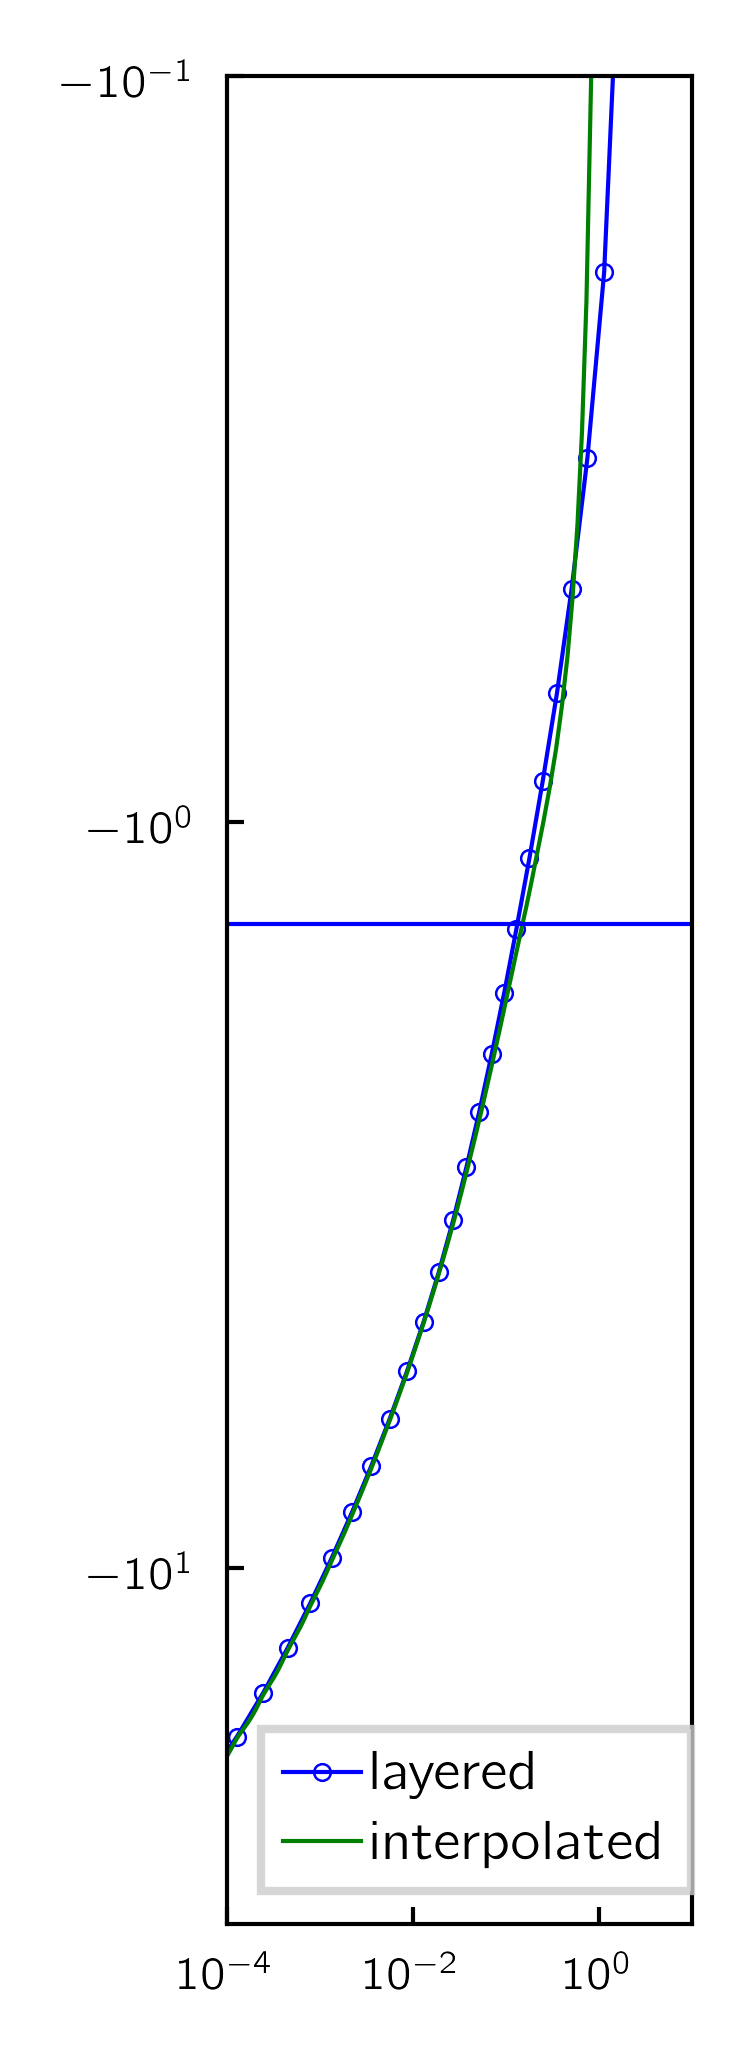

In [21]:
fig = plt.figure(figsize=[1,4]); ax = plt.gca()
ax.plot(ds.epsilon.sel(t=t).mean(dim=['x','y']), ds.z.isel(t=0).mean(dim=['x','y']), 
        '-o', label='layered')
ax.plot(qlist[0], znew, '-', label='interpolated')

ax.set_xscale('log')
ax.set_yscale('symlog', linthresh=1e-2)
ax.set_xlim([1e-4,10])
ax.set_ylim([-30,-1e-1])

ax.set_ylim([-5,0])

ax.axhline(ds.z.isel(t=0,zl=-1).min())
ax.legend()

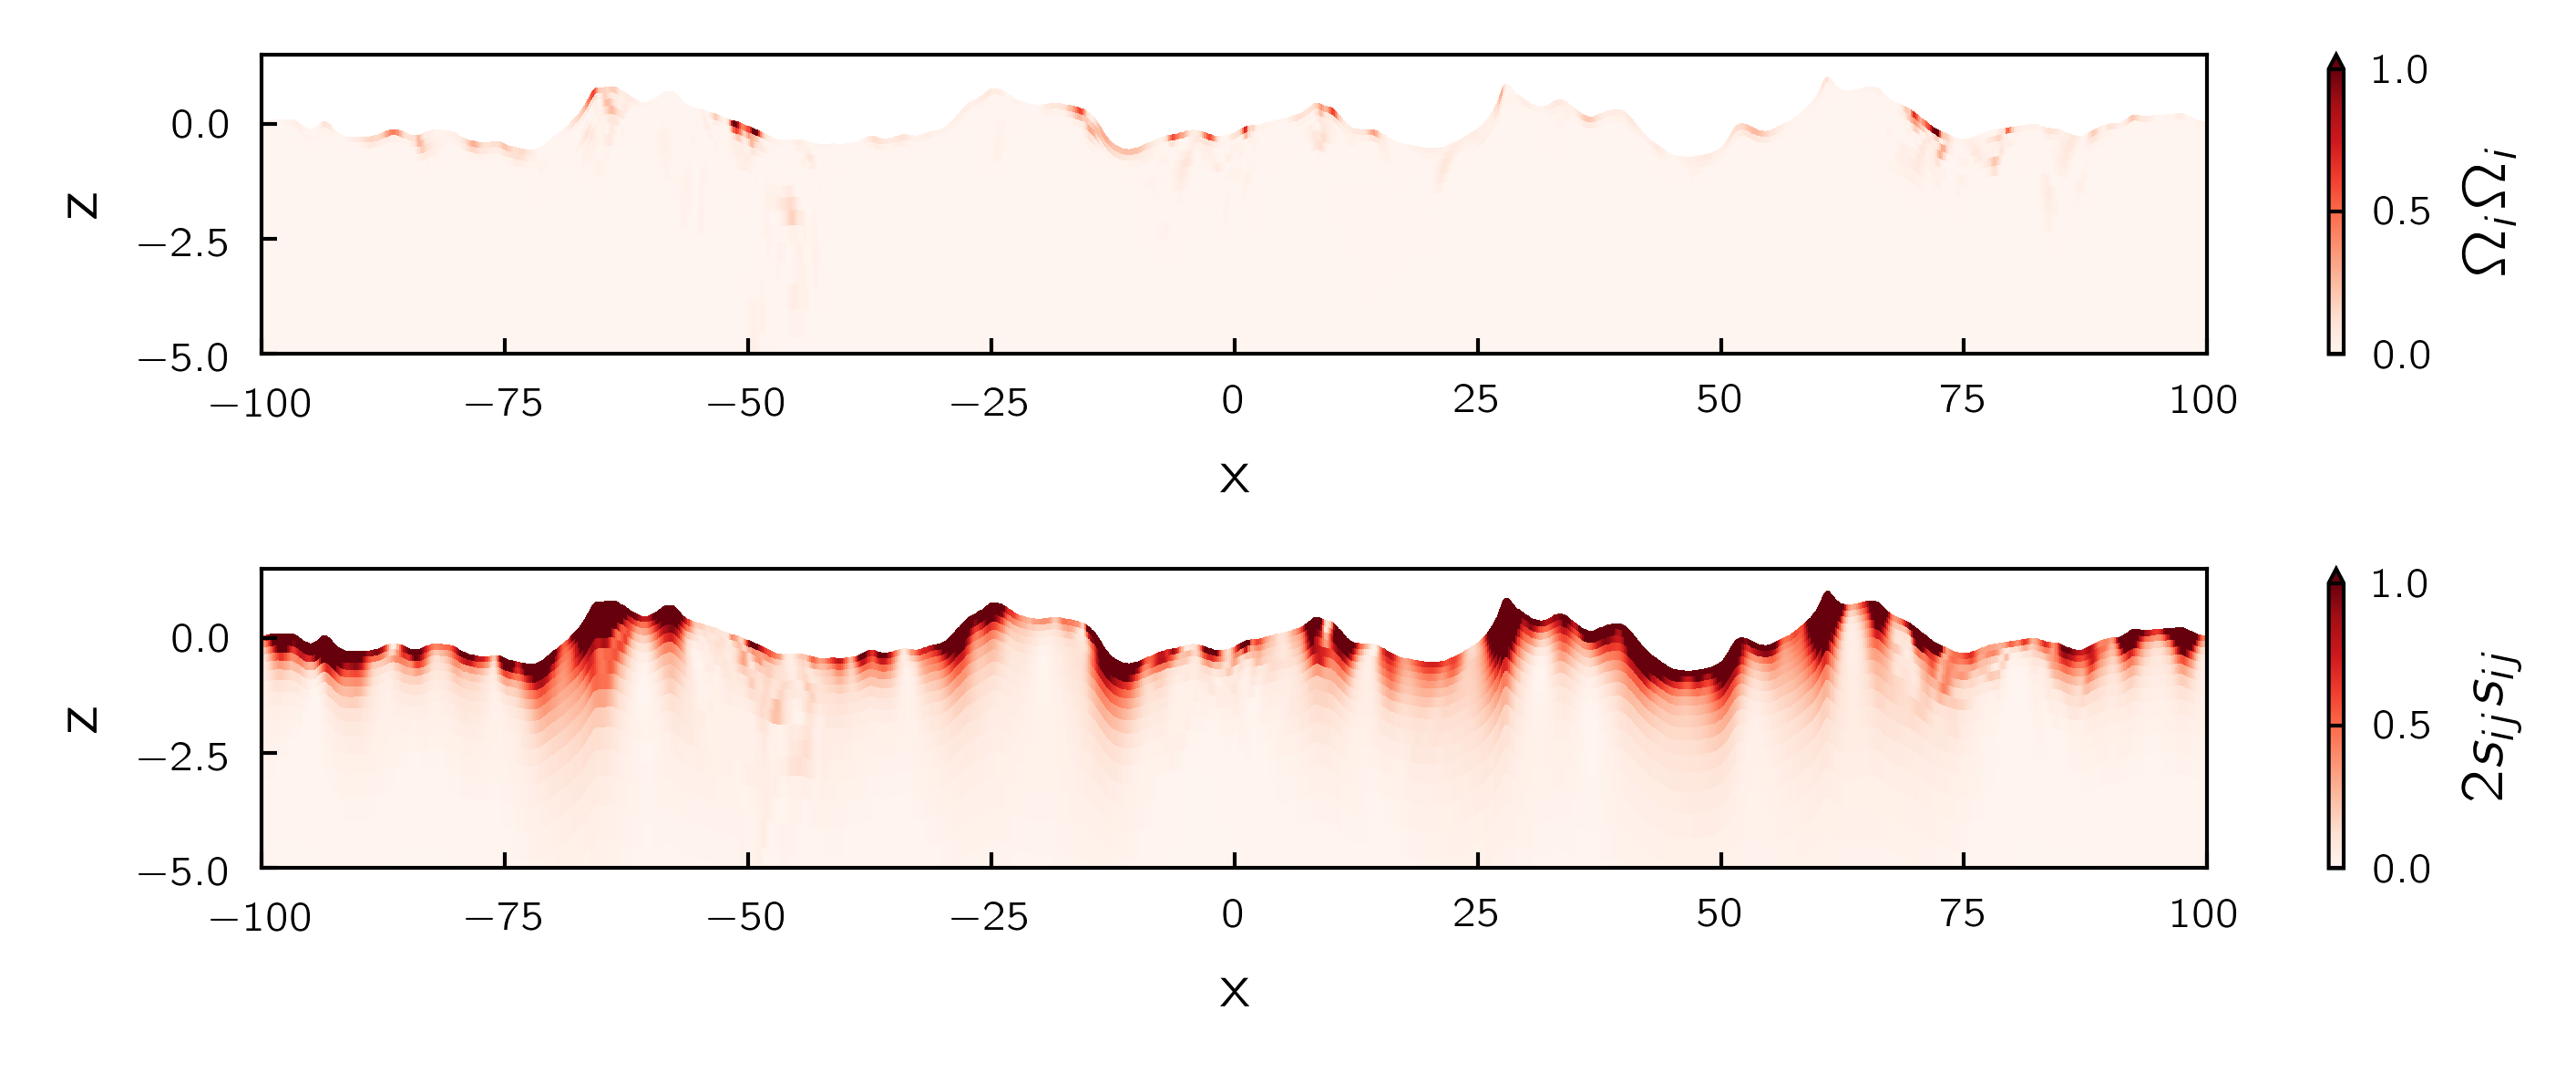

In [25]:
fig, axes = plt.subplots(2, 1, figsize=[5,2])
ds.vort2.isel(t=0,y=512).plot(x='x', y='z', ax=axes[0], vmax=1, vmin=0, cmap='Reds', 
                              cbar_kwargs={'label': r'$\Omega_{i}\Omega_{i}$'})
ds.epsilon.isel(t=0,y=512).plot(x='x', y='z', ax=axes[1], vmax=1, vmin=0, cmap='Reds', 
                                cbar_kwargs={'label': r'$2s_{ij}s_{ij}$'})
axes[0].set_ylim([-5,1.5]); axes[1].set_ylim([-5,1.5])
axes[0].set_title(''); axes[1].set_title('')
plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=[5,1])
ds.vort2.isel(t=0,y=512).plot(x='x',y='z',vmax=1,vmin=0,cmap='Reds')
plt.ylim([-5,1.5])